# Homework 7, Part Two: A dataset about dogs.

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/).

Some of the questions get kind of weird in this one, especially later on. **Feel free to lean on ChatGPT for the crazier ones!** It might be an interesting exploration of how to ask problems or explain what your dataset looks like.

## Do your importing and your setup

In [6]:
!ls
import pandas as pd
df = pd.read_csv('boro_population.csv')
df.head()

Dataset TWO - Dogs.ipynb
NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx
boro_population.csv
zipcodes-neighborhoods.csv


,borough,population,area_sqmi
0,Manhattan,1644518,23
1,Bronx,1455444,42
2,Brooklyn,2636735,71
3,Queens,2339150,109
4,Staten Island,474558,59


## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [11]:
Dog = pd.read_excel('NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx')
Dog.head()


,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12


## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

In [9]:
Dog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81937 entries, 0 to 81936
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Owner Zip Code          81937 non-null  int64         
 1   Animal Name             81738 non-null  object        
 2   Animal Gender           81937 non-null  object        
 3   Primary Breed           81937 non-null  object        
 4   Secondary Breed         10547 non-null  object        
 5   Animal Dominant Color   81608 non-null  object        
 6   Animal Secondary Color  56919 non-null  object        
 7   Animal Third Color      17641 non-null  object        
 8   Animal Birth            81937 non-null  datetime64[ns]
 9   Spayed or Neut          81937 non-null  object        
 10  Guard or Trained        49576 non-null  object        
 11  Vaccinated              81937 non-null  object        
 12  Application Date        81937 non-null  dateti

## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

Each row is related to dog pets in NY. "Animal Dominant Color" is the principal color of the dog and "Vaccinated" is whether the pet has vaccine or not. 

# Your thoughts

Think of three questions you could ask this dataset. **Don't ask them**, just write them down in the cell below. Feel free to use either Markdown or Python comments.

What's the dog's dominant color that people prefer? 
Which Zip Code has more dogs with vaccines? 
Is the animal gender related to Spayed or Neut?

# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

In [31]:
Dog['Primary Breed'].value_counts().head(10)

Primary Breed
Unknown                                 12894
Yorkshire Terrier                        5133
Shih Tzu                                 4727
Chihuahua                                3924
Maltese                                  2965
Labrador Retriever                       2872
American Pit Bull Terrier/Pit Bull       2153
American Pit Bull Mix / Pit Bull Mix     2029
Labrador Retriever Crossbreed            1864
Beagle                                   1438
Name: count, dtype: int64

## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

In [36]:

filtered = Dog[Dog['Primary Breed'] != 'Unknown']
breed = filtered['Primary Breed'].value_counts().head(10)
breed

Primary Breed
Yorkshire Terrier                       5133
Shih Tzu                                4727
Chihuahua                               3924
Maltese                                 2965
Labrador Retriever                      2872
American Pit Bull Terrier/Pit Bull      2153
American Pit Bull Mix / Pit Bull Mix    2029
Labrador Retriever Crossbreed           1864
Beagle                                  1438
Pomeranian                              1422
Name: count, dtype: int64

## What are the most popular dog names?

In [39]:
Dog['Animal Name'].value_counts().head(10)

Animal Name
UNKNOWN    742
Bella      527
Max        515
Charlie    403
Lola       387
Unknown    379
Rocky      354
Lucy       338
unknown    337
Coco       308
Name: count, dtype: int64

## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [47]:
Carla = Dog[Dog['Animal Name'] == 'Carla']['Animal Name'].count()
Carla

4

In [48]:
Max = Dog[Dog['Animal Name'] == 'Max']['Animal Name'].count()
Max

515

In [49]:
Maxwell = Dog[Dog['Animal Name'] == 'Maxwell']['Animal Name'].count()
Maxwell

30

## What percentage of dogs are guard dogs?

Check out the documentation for [value counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html).

In [55]:
guard = Dog[Dog['Guard or Trained'] == 'Yes']['Guard or Trained'].count()

total = Dog['Guard or Trained'].count()

(guard / total) * 100


0.1028723575923834

## What are the actual numbers?

In [60]:
Dog['Guard or Trained'].value_counts().head(10)

Guard or Trained
No     49525
Yes       51
Name: count, dtype: int64

## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll do some magic with `.value_counts()`

In [63]:
Dog['Guard or Trained'].value_counts(dropna=False)



Guard or Trained
No     49525
NaN    32361
Yes       51
Name: count, dtype: int64

## Fill in all of those empty "Guard or Trained" columns with "No"

Then check your result with another `.value_counts()`

In [66]:
Dog['Guard or Trained'].fillna('No', inplace=True)

guard = Dog['Guard or Trained'].value_counts(dropna=False)

guard

Guard or Trained
No     81886
Yes       51
Name: count, dtype: int64

## What are the top dog breeds for guard dogs? 

In [67]:
guard = Dog[Dog['Guard or Trained'] == 'Yes']
guard['Primary Breed'].value_counts().head(10)

Primary Breed
Unknown                                 11
German Shepherd Dog                      4
Chihuahua                                3
Labrador Retriever                       3
Rottweiler                               3
American Pit Bull Mix / Pit Bull Mix     3
Shih Tzu                                 2
Staffordshire Bull Terrier               2
Beagle Crossbreed                        1
Weimaraner                               1
Name: count, dtype: int64

## Create a new column called "year" that is the dog's year of birth

The `Animal Birth` column is a datetime, so you can get the year out of it with the code `df['Animal Birth'].apply(lambda birth: birth.year)`.

In [68]:
Dog['Year'] = Dog['Animal Birth'].apply(lambda birth: birth.year)

## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

In [75]:
from datetime import datetime, timedelta

Dog['Animal Birth'] = pd.to_datetime(Dog['Animal Birth'])

current_date = datetime.now()
Dog['Age'] = (current_date - Dog['Animal Birth']) / timedelta(days=365)

average = Dog['Age'].mean()

average 

13.879042450572356

# Joining data together

## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

Here's an example of how you can merge two dataframes:

```python
merged = prisons_df.merge(states_df, left_on='state', right_on='name')
```

In the example above, `prisons_df` has a column called `state` that matches with the `name` column of `states_df`. The columns of `states_df` are then added to `prisons_df` and returned as a new dataframe called `merged`.

> **Rows without a match get discarded because it is an [inner join](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html).** I think left joins are probably the most common (keep rows from the "left" df even if they don't have a match in the right. For example, by default a prison with the state of `PUERTO RICO` would be dropped if PR wasn't in `states_df`, but if you changed it to `how='left'` it would be preserved, but the additional columns would just be `NaN`.

In [80]:
zip = pd.read_csv('zipcodes-neighborhoods.csv')
zip.head()

Dog2 = zip.merge(Dog, left_on='zip', right_on='Owner Zip Code')

Dog2


,neighborhood,zip,borough,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,Year,Age
0,Central Bronx,10453,Bronx,10453,T-Bone,M,Bulldog,NaN,White,Tan,Apricot,2010-04-01,Yes,No,Yes,2014-11-16 16:48:08.080,2014-11-16,2016-11-16,2010,13.664998
1,Central Bronx,10453,Bronx,10453,Cici,F,American Pit Bull Mix / Pit Bull Mix,NaN,BROWN,RUST,BLACK,2008-11-01,Yes,No,No,2015-02-06 10:35:12.917,2015-02-06,2017-04-28,2008,15.078697
2,Central Bronx,10453,Bronx,10453,Blue,M,Basset Hound,NaN,Brown,Tan,Cream,2005-02-01,Yes,No,No,2015-02-10 16:43:24.847,2015-02-10,2017-02-10,2005,18.829381
3,Central Bronx,10453,Bronx,10453,Boi,M,Yorkshire Terrier,NaN,Black,Gray,Tan,2011-02-01,Yes,No,Yes,2015-02-10 16:43:24.847,2015-02-10,2017-02-10,2011,12.826642
4,Central Bronx,10453,Bronx,10453,MARSHMELLO,F,Samoyed,NaN,WHITE,NaN,NaN,2004-01-01,Yes,No,Yes,2015-03-27 14:47:53.483,2015-03-27,2017-03-30,2004,19.917053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80854,Mid-Island,10314,Staten Island,10314,Daisy,F,Shih Tzu,NaN,WHITE,TAN,BROWN,2004-01-01,Yes,No,Yes,2016-04-27 11:28:32.640,2016-04-27,2017-03-29,2004,19.917053
80855,Mid-Island,10314,Staten Island,10314,JAKE,M,Yorkshire Terrier,NaN,BLACK,BROWN,NaN,2003-01-01,Yes,No,Yes,2016-04-27 13:40:00.460,2016-04-27,2017-05-30,2003,20.917053
80856,Mid-Island,10314,Staten Island,10314,DAISY,F,Havanese,NaN,White,Cream,NaN,2015-12-01,No,No,Yes,2016-04-27 15:33:58.627,2016-04-27,2017-04-27,2015,7.993765
80857,Mid-Island,10314,Staten Island,10314,Chloe,F,Yorkshire Terrier,NaN,Tan,Black,NaN,2014-08-01,Yes,No,No,2016-04-27 20:12:21.177,2016-04-27,2018-03-25,2014,9.328012


## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

In [106]:
bronx = Dog2[Dog2['borough'] == 'Bronx']
bronx['Animal Name'].value_counts().head(5)

Animal Name
Rocky       60
Max         56
Bella       54
Lucky       51
Princess    43
Name: count, dtype: int64

In [129]:
filtered1 = Dog2[Dog2['borough'] != 'Unknown']
Br = Dog2[Dog2['borough'] == 'Brooklyn']
Br['Animal Name'].value_counts().head(5)

Animal Name
unknown    234
Unknown    161
UNKNOWN    155
Max        113
Bella      112
Name: count, dtype: int64

In [114]:
Dog2['neighborhood'].value_counts().head(10)

neighborhood
Upper West Side                  5364
Upper East Side                  5083
Northwest Brooklyn               4498
Chelsea and Clinton              4066
South Shore                      4005
Lower East Side                  3195
West Queens                      2961
Southeast Bronx                  2807
West Central Queens              2773
Gramercy Park and Murray Hill    2671
Name: count, dtype: int64

In [113]:
Upp = Dog2[Dog2['neighborhood'] == 'Upper East Side']
Upp['Animal Name'].value_counts().head(5)

Animal Name
Lucy       40
Bella      31
Charlie    29
Coco       29
NO NAME    26
Name: count, dtype: int64

## What is the most common dog breed in each of the neighborhoods of NYC?

In [128]:
filtered = Dog2[Dog2['Primary Breed'] != 'Unknown']

most_common = filtered.groupby('neighborhood')['Primary Breed'].agg(lambda x: x.value_counts().idxmax())

most_common

neighborhood
Borough Park                                      Yorkshire Terrier
Bronx Park and Fordham                            Yorkshire Terrier
Bushwick and Williamsburg                         Yorkshire Terrier
Canarsie and Flatlands                            Yorkshire Terrier
Central Bronx                                     Yorkshire Terrier
Central Brooklyn                                  Yorkshire Terrier
Central Harlem                                    Yorkshire Terrier
Central Queens                                    Yorkshire Terrier
Chelsea and Clinton                                       Chihuahua
East Harlem                                       Yorkshire Terrier
East New York and New Lots       American Pit Bull Terrier/Pit Bull
Flatbush                                          Yorkshire Terrier
Gramercy Park and Murray Hill                     Yorkshire Terrier
Greenpoint                                                Chihuahua
Greenwich Village and Soho         

## What breed of dogs are the least likely to be spayed? Male or female?

In [134]:
filtered2 = Dog2.dropna(subset=['Spayed or Neut'])

filtered2.groupby('Primary Breed')['Spayed or Neut'].value_counts(normalize=True).unstack()['No'].sort_values()


Primary Breed
Collie Crossbreed           0.020270
Great Pyrenees              0.021277
Greyhound                   0.033113
Schipperkee                 0.033333
Tibetan Spaniel             0.035714
                              ...   
Spanish Water Dog                NaN
Sussex Spaniel                   NaN
Swedish Vallhund                 NaN
Treeing Walker Coonhound         NaN
Xoloitzcuintli                   NaN
Name: No, Length: 278, dtype: float64

In [135]:
filtered3 = Dog2.dropna(subset=['Spayed or Neut'])
filtered3.groupby('Animal Gender')['Spayed or Neut'].value_counts(normalize=True).unstack()['No']

Animal Gender
          NaN
F    0.154829
M    0.223517
Name: No, dtype: float64

## Make a new column called monochrome that is True for any animal that only has black, white or grey as one of its colors. How many animals are monochrome?

In [138]:
Dog2['monochrome'] = Dog2.apply(lambda row: all(str(color).lower() in {'black', 'white', 'grey'} for color in [row['Animal Dominant Color'], row['Animal Secondary Color'], row['Animal Third Color'] if not pd.isna(color)]), axis=1)

num_monochrome_animals = Dog2['monochrome'].sum()


SyntaxError: expected 'else' after 'if' expression (1979340713.py, line 1)

## How many dogs are in each borough? Plot it in a graph.

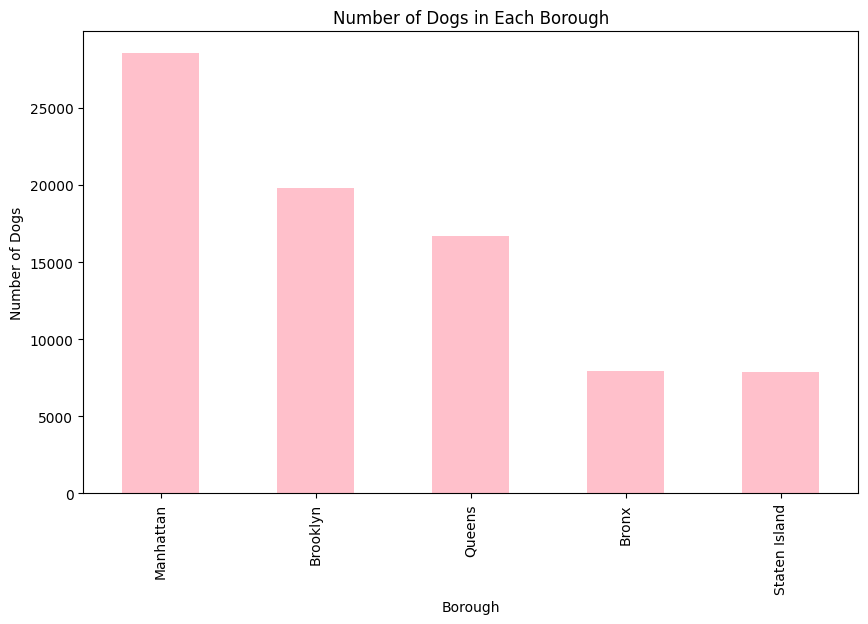

In [148]:
dogs = Dog2['borough'].value_counts()

plt.figure(figsize=(10, 6))
dogs.plot(kind='bar', color='pink')
plt.xlabel('Borough')
plt.ylabel('Number of Dogs')
plt.title('Number of Dogs in Each Borough')
plt.show()


## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? This is very crazy, so ask in Slack, or a TA, or our buddy ChatGPT.

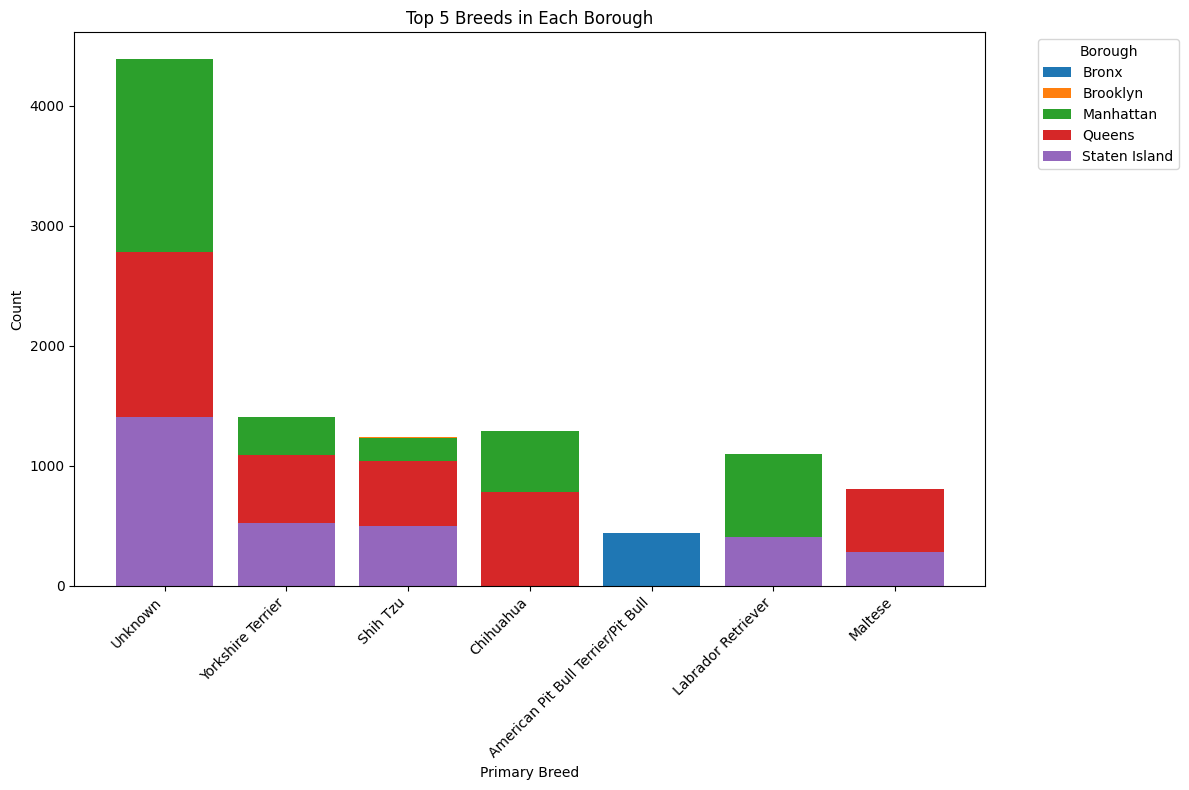

In [151]:


breeds_by_borough = Dog2.groupby(['borough', 'Primary Breed']).size().reset_index(name='count')

breeds_by_borough_sorted = breeds_by_borough.sort_values(['borough', 'count'], ascending=[True, False])


top5_breeds_by_borough = breeds_by_borough_sorted.groupby('borough').head(5)

plt.figure(figsize=(12, 8))
for borough, group in top5_breeds_by_borough.groupby('borough'):
    plt.bar(group['Primary Breed'], group['count'], label=borough)

plt.xlabel('Primary Breed')
plt.ylabel('Count')
plt.title('Top 5 Breeds in Each Borough')
plt.legend(title='Borough', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## What percentage of dogs are not guard dogs?

In [153]:
guard = Dog2['Guard or Trained'].value_counts()
(guard.get('No', 0) / len(Dog2['Guard or Trained'])) * 100


99.93940068514327